In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), 'src/'))

import pandas as pd
pd.set_option('display.max_rows', 500)

from oce_ecomm_abv_calculation.datasets.default_datasets import uci_online_retail_ii_customer_order_view
from oce_ecomm_abv_calculation.sample_statistics.vanilla import VanillaSampleStatistics
from oce_ecomm_abv_calculation.sample_statistics.oneway_bootstrap import OnewayBootstrapStatistics
from datetime import datetime

from matplotlib import pyplot as plt
import numpy as np

In [2]:
uci_retail_co_df = uci_online_retail_ii_customer_order_view()

In [3]:
uci_retail_co_df

,RandomizationUnitId,AnalysisUnitId,EventReceivedTime,r_BasketValue,r_BasketSize
0,12346,499763,2010-03-02 13:08:00,27.05,5
1,12346,513774,2010-06-28 13:53:00,142.31,19
2,12346,541431,2011-01-18 10:01:00,77183.60,74215
3,12347,529924,2010-10-31 14:20:00,611.53,509
4,12347,537626,2010-12-07 14:57:00,1423.58,638
...,...,...,...,...,...
36589,18287,523290,2010-09-21 12:19:00,30.60,12
36590,18287,534346,2010-11-22 11:51:00,331.50,186
36591,18287,554065,2011-05-22 10:39:00,765.28,488
36592,18287,570715,2011-10-12 10:23:00,1001.32,990


In [2]:
vanilla = (
    VanillaSampleStatistics(
        dataset="uci_online_retail_ii_customer_order_view",
        response_col='r_BasketValue',
        start_time=datetime(2009, 12, 1),
        end_time=datetime(2012, 1, 1)
    )
)

In [3]:
vanilla.mean()

476.42959903262823

In [4]:
vanilla.standard_error()

7.183842985657441

In [5]:
oneway = (
    OnewayBootstrapStatistics(
        dataset="uci_online_retail_ii_customer_order_view",
        response_col='r_BasketValue',
        start_time=datetime(2009, 12, 1),
        end_time=datetime(2012, 1, 1)
    )
)

In [6]:
oneway.standard_error(num_bootstrap_means=500, verbose=True)

25.1852944955207

In [7]:
oneway.save_latest_result_as_pd_df()

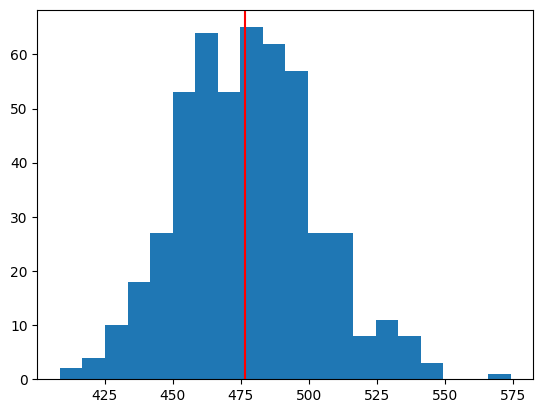

In [8]:
plt.hist(oneway.latest_means, bins=20)
plt.axvline(vanilla.mean(), c='red')

In [9]:
pd.read_parquet("data/expt_oneway_uci-online-retail-ii-customer-order-view_r-BasketValue_1667179189.parquet")

,dataset_name,response_col,start_time,end_time,num_bootstrap_means,bootstrap_mean,bootstrap_means,bootstrap_standard_error,count
0,uci_online_retail_ii_customer_order_view,r_BasketValue,2009-12-01,2012-01-01,500,477.220267,"[462.7314145728643, 465.1483613982705, 431.872...",25.185294,36594


In [17]:
min(oneway.dataset["EventReceivedTime"])

Timestamp('2009-12-01 07:45:00')

In [18]:
max(oneway.dataset["EventReceivedTime"])

Timestamp('2011-12-09 12:50:00')

In [22]:
test = (
    OnewayBootstrapStatistics(
        dataset=uci_retail_co_df,
        response_col='r_BasketValue',
        start_time=datetime(2009, 12, 1),
        end_time=datetime(2010, 1, 1)
    )
)

In [25]:
VanillaSampleStatistics(
    dataset=uci_retail_co_df,
    response_col='r_BasketValue',
    start_time=datetime(2009, 12, 1),
    end_time=datetime(2010, 1, 1)
).mean()

454.9540547762191

In [26]:
VanillaSampleStatistics(
    dataset=uci_retail_co_df,
    response_col='r_BasketValue',
    start_time=datetime(2009, 12, 1),
    end_time=datetime(2010, 1, 1)
).standard_error()

20.7153738710143

In [23]:
test.standard_error(num_bootstrap_means=500, verbose=True)

33.361322137953174

In [ ]:
uci_retail_co_abv_oneway = (
    OnewayBootstrapStatistics(
        dataset="uci_online_retail_ii_customer_order_view",
        response_col='r_BasketValue',
        start_time=datetime(2009, 12, 1),
        end_time=datetime(2012, 1, 1)
    )
)

for i in range(0, 30):
    uci_retail_co_abv_oneway.standard_error(num_bootstrap_means=500, verbose=True)
    uci_retail_co_abv_oneway.save_result_as_pd_df()
    print(f"Run {i} saved.")

In [ ]:
uci_retail_co_abs_oneway = (
    OnewayBootstrapStatistics(
        dataset="uci_online_retail_ii_customer_order_view",
        response_col='r_BasketSize',
        start_time=datetime(2009, 12, 1),
        end_time=datetime(2012, 1, 1)
    )
)

for i in range(0, 30):
    uci_retail_co_abs_oneway.standard_error(num_bootstrap_means=500, verbose=True)
    uci_retail_co_abs_oneway.save_result_as_pd_df()
    print(f"Run {i} saved.")

In [ ]:
uci_retail_coi_asp_oneway = (
    OnewayBootstrapStatistics(
        dataset="uci_online_retail_ii_customer_order_item_view",
        response_col='r_SellingPrice',
        start_time=datetime(2009, 12, 1),
        end_time=datetime(2012, 1, 1)
    )
)

for i in range(0, 10):
    uci_retail_coi_asp_oneway.standard_error(num_bootstrap_means=500, verbose=True)
    uci_retail_coi_asp_oneway.save_result_as_pd_df()
    print(f"Run {i} saved.")